In [1]:
"""
Samuel Grant 2024
Look at track angle of incidence
"""

'\nSamuel Grant 2024\nLook at track angle of incidence\n'

In [2]:
# External
import os
import sys
import numpy as np
import uproot
import awkward as ak
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as patches

# Internal
sys.path.append(os.path.abspath("../PyMacros"))
import Utils as ut
import PrintUtils as pr

In [3]:
def Plot1D(data, nbins=100, xmin=-1.0, xmax=1.0, title=None, xlabel=None, ylabel=None, fout="hist.png", legPos="best", log=False, stats=True, underOver=False, errors=False, NDPI=300):
    
    data = np.array(data)
    # data = np.flatten(data)

    # Create figure and axes
    fig, ax = plt.subplots()

    # Plot the histogram with outline
    counts, bin_edges, _ = ax.hist(data, bins=nbins, range=(xmin, xmax), histtype='step', edgecolor='black', linewidth=1.0, fill=False, density=False)

    # Log scale 
    if log:
        ax.set_yscale('log')
        
    # Set x-axis limits
    ax.set_xlim(xmin, xmax)

    # Calculate statistics
    N, mean, meanErr, stdDev, stdDevErr, underflows, overflows = ut.GetBasicStats(data, xmin, xmax)

    # # Create legend text
    legendText = f"Entries: {N}\nMean: {ut.Round(mean, 3)}\nStd Dev: {ut.Round(stdDev, 3)}"
    if errors: legendText = f"Entries: {N}\nMean: {ut.Round(mean, 3)}" + r"$\pm$" + f"{ut.Round(meanErr, 1)}\nStd Dev: {ut.Round(stdDev, 3)}" + r"$\pm$" + f"{ut.Round(stdDevErr, 1)}"
    if underOver: legendText += f"\nUnderflows: {underflows}\nOverflows: {overflows}"

    # Add legend to the plot
    if stats: ax.legend([legendText], loc=legPos, frameon=False, fontsize=13)

    ax.set_title(title, fontsize=15, pad=10)
    ax.set_xlabel(xlabel, fontsize=13, labelpad=10) 
    ax.set_ylabel(ylabel, fontsize=13, labelpad=10) 

    # Set font size of tick labels on x and y axes
    ax.tick_params(axis='x', labelsize=13)  # Set x-axis tick label font size
    ax.tick_params(axis='y', labelsize=13)  # Set y-axis tick label font size

    # ut.ScientificNotation(ax)
    # if (ax.get_ylim()[1] > 9.999e3) or (ax.get_ylim()[1] < 9.999e-2):
    #             ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    #             ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    #             ax.yaxis.offsetText.set_fontsize(14)
    
    # if (ax.get_ylim()[1] > 9.999e2) or (ax.get_ylim()[1] < 9.999e-2):
    #         ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    #         ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    #         ax.yaxis.offsetText.set_fontsize(14)

    plt.ticklabel_format(useOffset=False)
    
    # plt.ticklabel_format(axis='y', style='plain', useOffset=False)

    plt.tight_layout()

    plt.savefig(fout, dpi=NDPI, bbox_inches="tight")
    plt.show()

    # Clear memory
    plt.close()

    print("\n---> Written:\n\t", fout)

    return

In [4]:
# Plot2D 
def Plot2D(x, y, nbinsX=100, xmin=-1.0, xmax=1.0, nbinsY=100, ymin=-1.0, ymax=1.0, min_box_coords=None, max_box_coords=None, box_colour="w", title=None, xlabel=None, ylabel=None, fout="hist.png", log=False, cb=True, NDPI=300):

    # Filter out empty entries from x and y
    valid_indices = [i for i in range(len(x)) if np.any(x[i]) and np.any(y[i])]

    # Extract valid data points based on the indices
    x = [x[i] for i in valid_indices]
    y = [y[i] for i in valid_indices]

    # Check if the input arrays are not empty and have the same length
    if len(x) == 0 or len(y) == 0:
        print("Input arrays are empty.")
        return
    if len(x) != len(y):
        print("Input arrays x and y have different lengths.")
        return

    # Create 2D histogram
    hist, x_edges, y_edges = np.histogram2d(x, y, bins=[nbinsX, nbinsY], range=[[xmin, xmax], [ymin, ymax]])

    # Set up the plot
    fig, ax = plt.subplots()

    norm = colors.Normalize(vmin=0, vmax=np.max(hist))  
    if log: norm = colors.LogNorm(vmin=1, vmax=np.max(hist)) 

    # Plot the 2D histogram
    im = ax.imshow(hist.T, cmap='inferno', extent=[xmin, xmax, ymin, ymax], aspect='auto', origin='lower', norm=norm)  # , vmax=np.max(hist), norm=colors.LogNorm())
    # im = ax.imshow(hist.T, extent=[xmin, xmax, ymin, ymax], aspect='auto', origin='lower', vmax=np.max(hist))

    # Add colourbar
    if cb: plt.colorbar(im)

    # Draw a box if min_box_coords and max_box_coords are provided
    if min_box_coords and max_box_coords:
        x_min, y_min = min_box_coords
        x_max, y_max = max_box_coords
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=1, linestyle="--", edgecolor=box_colour, facecolor="none")
        ax.add_patch(rect)

    plt.title(title, fontsize=16, pad=10)
    plt.xlabel(xlabel, fontsize=14, labelpad=10)
    plt.ylabel(ylabel, fontsize=14, labelpad=10)

    ut.ScientificNotation(ax)

    plt.tight_layout()

    plt.savefig(fout, dpi=NDPI, bbox_inches="tight")
    plt.show()
    
    plt.close()
    
    print("\n---> Written:\n\t", fout)

    return

In [5]:
# Get data
# fileName="/exp/mu2e/data/users/sgrant/CRVSim/CosmicCRYExtractedCatTriggered.MDC2020ae_best_v1_3.000/11946817/00/00023/nts.sgrant.CosmicCRYExtractedCatTriggered.MDC2020ae_best_v1_3.001205_00000000.root" 
fileName="/exp/mu2e/data/users/sgrant/CRVSim/CosmicCRYExtractedCatTriggered.MDC2020ae_best_v1_3.000/81168767/00/00000/nts.sgrant.CosmicCRYExtractedCatTriggered.MDC2020ae_best_v1_3.001205_00000014.root"
finTag = fileName.split('.')[-2] 
recon="MDC2020ae"
with uproot.open(fileName) as file:
    data_ = ut.GetData(file)

In [25]:
# With fiducial area cut
def ApplyTrackerCuts(arrays_, fail=False, quiet=False, fid=True):
    
    if not quiet: print(f"\n---> Applying tracker cuts") 

    # Mark cuts on the track and track fit level
    arrays_["trkfit_KLCRV1"] = ( 
        (arrays_["trkfit"]["klfit"]["sid"] == 200) 
        & (arrays_["trkfit"]["klfit"]["sindex"] == 1) )

    arrays_["trk_bestFit"] = ( 
        (arrays_["trk"]["kl.ndof"] >= 10)
        & (arrays_["trk"]["kl.fitcon"] > 0.1)
        & ((arrays_["trk"]["kl.nactive"]/arrays_["trk"]["kl.nhits"]) > 0.99)
        & (arrays_["trk"]["kl.nplanes"] >= 4)
        & ((arrays_["trk"]["kl.nnullambig"]/arrays_["trk"]["kl.nhits"]) < 0.2) )
    
    arrays_["trkfit_bestFit"] = ( 
        (arrays_["trkfit"]["klkl"]["z0err"] < 1) 
        & (arrays_["trkfit"]["klkl"]["d0err"] < 1) 
        & (arrays_["trkfit"]["klkl"]["thetaerr"] < 0.004)
        & (arrays_["trkfit"]["klkl"]["phi0err"] < 0.001) )
    
    arrays_["trkfit_CRV1Fiducial"] = ( 
            (abs(arrays_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"]) < 3388/2)
            & (abs(arrays_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"] + 500) < 2570/2) ) 
    
    if not fail: 
        # Create masks
        if fid: 
            arrays_["trkfit"] = arrays_["trkfit"][(arrays_["trkfit_bestFit"] & arrays_["trkfit_KLCRV1"] & arrays_["trkfit_CRV1Fiducial"])]
        else:
            arrays_["trkfit"] = arrays_["trkfit"][(arrays_["trkfit_bestFit"] & arrays_["trkfit_KLCRV1"])]
            
        arrays_["trk"] = arrays_["trk"][arrays_["trk_bestFit"]]
    else: 
        # Create masks
        if fid: 
            arrays_["trkfit"] = arrays_["trkfit"][~(arrays_["trkfit_bestFit"] & arrays_["trkfit_KLCRV1"] & arrays_["trkfit_CRV1Fiducial"])]
        else:
            arrays_["trkfit"] = arrays_["trkfit"][~(arrays_["trkfit_bestFit"] & arrays_["trkfit_KLCRV1"])]
            
        arrays_["trk"] = arrays_["trk"][~arrays_["trk_bestFit"]]

    # Check for a track in the event after cuts.
    trkCut = ak.any(arrays_["trk"]["kl.status"], axis=1, keepdims=False) > 0 
    # Check for a track fit in the event after cuts
    trkFitCut = (
        (ak.count(arrays_["trkfit"]["klfit"]["sid"], axis=-1, keepdims=False) > 0) 
        & (ak.count(arrays_["trkfit"]["klkl"]["z0err"], axis=-1, keepdims=False) > 0) )
    
    # Reset to event level
    trkFitCut = ak.any(trkFitCut, axis=-1, keepdims=False) == True 

    # Both do the same thing, but mark them pass/fail for bookkeeping.
    if not fail: 
        arrays_["pass_track_cuts"] = (trkCut & trkFitCut)
        return arrays_[arrays_["pass_track_cuts"]]
    else: 
        arrays_["fail_track_cuts"] = (trkCut & trkFitCut)
        return arrays_[arrays_["fail_track_cuts"]]


---> Applying tracker cuts

---> Applying tracker cuts
-------------------------------------------------------------------------------------
***** evt *****
evtinfo.run: 1205
evtinfo.subrun: 14
evtinfo.eventid: 10780
***** crv *****
crvcoincs.sectorType: [1, 2, 3]
crvcoincs.nLayers [4, 4, 4]
crvcoincs.angle: [-0.727, 0, -0.376]
crvcoincs.pos.fCoordinates: ([1.05e+03, 698, 1.06e+03], [4.77e+03, 4.62e+03, 4.92e+03], [-1.02e+03, -437, -1.09e+03])
crvcoincs.timeStart: [2.76e+04, 2.76e+04, 2.76e+04]
crvcoincs.time: [2.76e+04, 2.76e+04, 2.76e+04]
crvcoincs.PEs: [601, 526, 614]
crvcoincs.PEsPerLayer[4]: [[154, 147, 151, 149], [107, 160, 137, 121], [167, 153, 152, 141]]
crvcoincs.nHits: [16, 8, 16]
crvcoincsmc.pdgId: [13, 13, 13]
crvcoincsmc.valid: [True, True, True]
crvcoincsmc.primaryE: [900, 900, 900]
***** trk *****
kl.status: [1]
kl.nactive: [14]
kl.nhits: [14]
kl.nplanes: [4]
kl.nnullambig: [1]
kl.ndof: [23]
kl.kl.fitcon: [0.998]
***** trkfit *****
klfit: [[{mom: {fCoordinates: {...}}, 

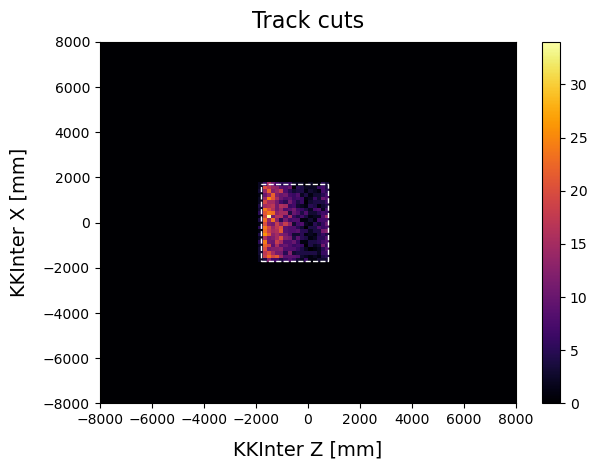


---> Written:
	 ../Images/MDC2020ae/TrackAngle/h2_ZX_track_cuts.png


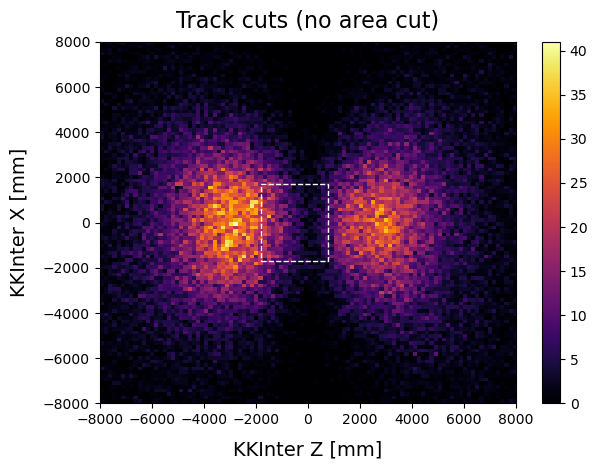


---> Written:
	 ../Images/MDC2020ae/TrackAngle/h2_ZX_track_cuts_no_fid.png


In [31]:
# data_ = ak.copy(data_)
track_cuts_ = ak.copy(data_)
track_cuts_no_fid_ = ak.copy(data_)
track_cuts_ = ApplyTrackerCuts(track_cuts_, fail=False, fid=True)
track_cuts_no_fid_ = ApplyTrackerCuts(track_cuts_no_fid_, fail=False, fid=False)

pr.PrintNEvents(track_cuts_, 1, masks_ = ["pass_track_cuts", "trk_bestFit", "trkfit_bestFit", "trkfit_KLCRV1", "trkfit_CRV1Fiducial"])

# print(len(track_cuts_))

min_box_coords = (-(2570/2)-500, -(3388/2))
max_box_coords = (+(2570/2)-500, +(3388/2))

Plot2D(x=ak.flatten(track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
       , y=ak.flatten(track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
       , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000
       , min_box_coords=min_box_coords, max_box_coords=max_box_coords
       , title="Track cuts", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
       , fout=f"../Images/{recon}/TrackAngle/h2_ZX_track_cuts.png")

Plot2D(x=ak.flatten(track_cuts_no_fid_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
       , y=ak.flatten(track_cuts_no_fid_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
       , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000
       , min_box_coords=min_box_coords, max_box_coords=max_box_coords
       , title="Track cuts (no area cut)", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
       , fout=f"../Images/{recon}/TrackAngle/h2_ZX_track_cuts_no_fid.png")

# Plot2D(x=ak.flatten(track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
#        , y=ak.flatten(track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="Track cuts", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
#        , fout=f"../Images/{recon}/TrackAngle/h2_ZY_track_cuts.png")

# Plot2D(x=ak.flatten(track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
#        , y=ak.flatten(track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="Track cuts", xlabel="KKInter X [mm]", ylabel="KKInter Y [mm]"
#        , fout=f"../Images/{recon}/TrackAngle/h2_XY_track_cuts.png")

In [17]:
def Plot1DOverlay(hists_, nbins=100, xmin=-1.0, xmax=1.0, title=None, xlabel=None, ylabel=None, fout="hist.png", legPos="best", NDPI=300, includeBlack=False, log=False, legFontSize=12, norm=False):

    # Create figure and axes
    fig, ax = plt.subplots()

    # Iterate over the hists and plot each one
    for i, (label, hist) in enumerate(hists_.items()):
        colour = ut.colours[i+1]
        if not includeBlack: colour = ut.colours[i+1]
            
        # if norm:
        #     hist = hist / np.sum(hist)
            
        counts, bin_edges, _ = ax.hist(hist, bins=nbins, range=(xmin, xmax), histtype='step', edgecolor=colour, linewidth=1.0, fill=False, density=norm, color=colour, label=label, log=log)

    # Set x-axis limits
    ax.set_xlim(xmin, xmax)

    ax.set_title(title, fontsize=16, pad=10)
    ax.set_xlabel(xlabel, fontsize=14, labelpad=10) 
    ax.set_ylabel(ylabel, fontsize=14, labelpad=10) 

    # Set font size of tick labels on x and y axes
    ax.tick_params(axis='x', labelsize=14)  # Set x-axis tick label font size
    ax.tick_params(axis='y', labelsize=14)  # Set y-axis tick label font size
    
    ut.ScientificNotation(ax)

    # Add legend to the plot
    ax.legend(loc=legPos, frameon=False, fontsize=legFontSize)

    # plt.ticklabel_format(useOffset=False)
    # plt.ticklabel_format(axis='y', style='plain', useOffset=False)

    plt.tight_layout()

    plt.savefig(fout, dpi=NDPI, bbox_inches="tight")
    plt.show()

    # Clear memory
    plt.close()

    return

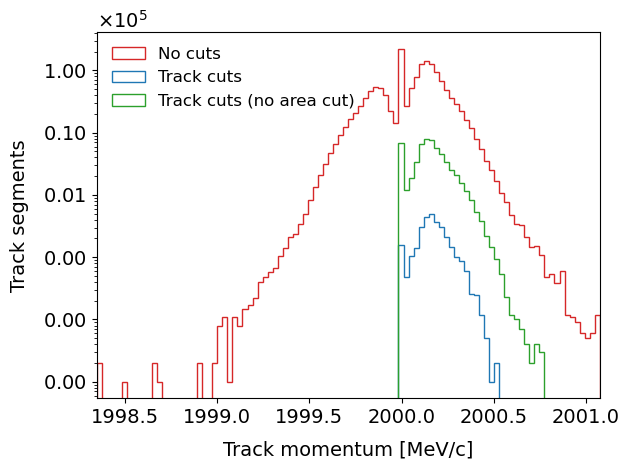

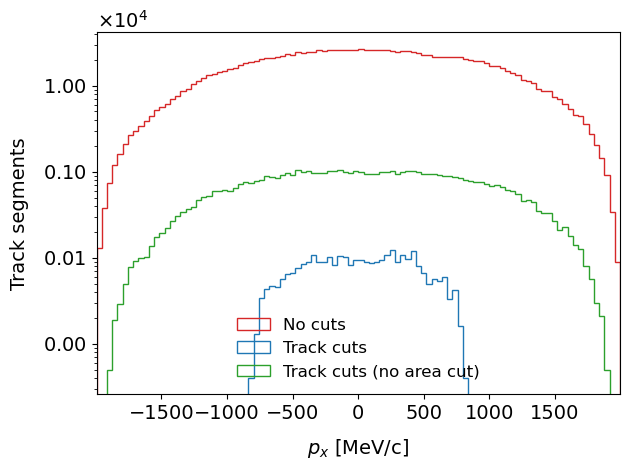

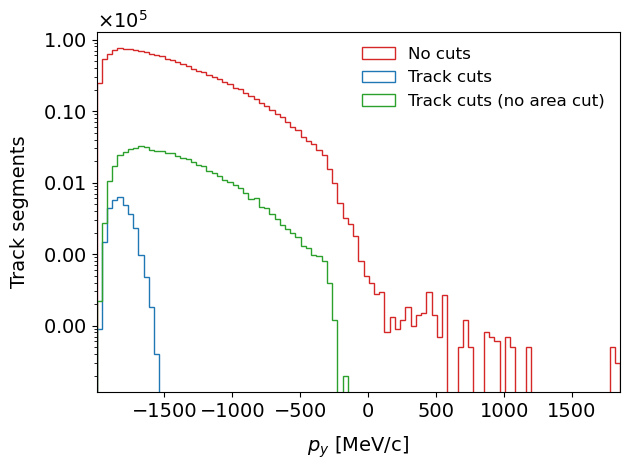

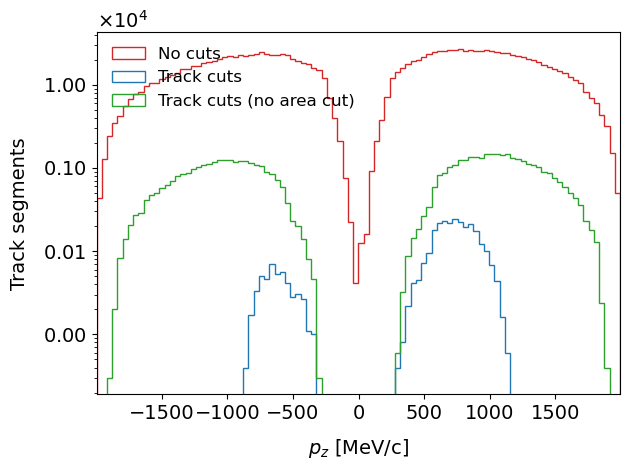

In [45]:
# Momentum
px_raw_ = ak.flatten(data_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fX"], axis=None)
py_raw_ = ak.flatten(data_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fY"], axis=None)
pz_raw_ = ak.flatten(data_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fZ"], axis=None)
ptot_raw_ = np.sqrt( px_raw_**2 + py_raw_**2 + pz_raw_**2 )

px_cut_ = ak.flatten(track_cuts_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fX"], axis=None)
py_cut_ = ak.flatten(track_cuts_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fY"], axis=None)
pz_cut_ = ak.flatten(track_cuts_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fZ"], axis=None)
ptot_cut_ = np.sqrt( px_cut_**2 + py_cut_**2 + pz_cut_**2 )

px_cut_no_fid_ = ak.flatten(track_cuts_no_fid_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fX"], axis=None)
py_cut_no_fid_ = ak.flatten(track_cuts_no_fid_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fY"], axis=None)
pz_cut_no_fid_ = ak.flatten(track_cuts_no_fid_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fZ"], axis=None)
ptot_cut_no_fid_ = np.sqrt( px_cut_no_fid_**2 + py_cut_no_fid_**2 + pz_cut_no_fid_**2 )

# Plot1D(ptot_raw_
#        , nbins=100, xmin=np.min(ptot_raw_), xmax=np.max(ptot_raw_)
#        , title="No cuts", xlabel="Track momentum [MeV/c]", ylabel="Track segments"
#        , fout=f"../Images/{recon}/TrackCuts/h1_trkMom_raw.png")

# Plot1D(ptot_cut_
#        , nbins=100, xmin=np.min(ptot_raw_), xmax=np.max(ptot_raw_)
#        , title="Track cuts", xlabel="Track momentum [MeV/c]", ylabel="Track segments"
#        , fout=f"../Images/{recon}/TrackCuts/h1_trkMom_track_cuts.png")

Plot1DOverlay({"No cuts" : ptot_raw_, "Track cuts" : ptot_cut_, "Track cuts (no area cut)" : ptot_cut_no_fid_}
              , nbins=100, xmin=np.min(ptot_raw_), xmax=np.max(ptot_raw_)
              , xlabel="Track momentum [MeV/c]", ylabel="Track segments" # (normalised)"
              , fout=f"../Images/{recon}/TrackCuts/h1_trkMom_cut_overlay.png"
              # , norm=True
              , log=True
              , legPos="upper left")

Plot1DOverlay({"No cuts" : px_raw_, "Track cuts" : px_cut_, "Track cuts (no area cut)" : px_cut_no_fid_}
              , nbins=100, xmin=np.min(px_raw_), xmax=np.max(px_raw_)
              , xlabel="$p_{x}$ [MeV/c]", ylabel="Track segments"# (normalised)"
              , fout=f"../Images/{recon}/TrackCuts/h1_trkMomX_cut_overlay.png"
              # , norm=True
              , log=True
              , legPos="best")

Plot1DOverlay({"No cuts" : py_raw_, "Track cuts" : py_cut_, "Track cuts (no area cut)" : py_cut_no_fid_}
              , nbins=100, xmin=np.min(py_raw_), xmax=np.max(py_raw_)
              , xlabel="$p_{y}$ [MeV/c]", ylabel="Track segments" # (normalised)"
              , fout=f"../Images/{recon}/TrackCuts/h1_trkMomY_cut_overlay.png"
              # , norm=True
              , log=True
              , legPos="best")

Plot1DOverlay({"No cuts" : pz_raw_, "Track cuts" : pz_cut_, "Track cuts (no area cut)" : pz_cut_no_fid_}
              , nbins=100, xmin=np.min(pz_raw_), xmax=np.max(pz_raw_)
              , xlabel="$p_{z}$ [MeV/c]", ylabel="Track segments" # (normalised)"
              , fout=f"../Images/{recon}/TrackCuts/h1_trkMomZ_cut_overlay.png"
              # , norm=True
              , log=True
              , legPos="upper left")

# Plot1D(px
#        , nbins=100, xmin=np.min(px), xmax=np.max(px)
#        , title="Raw", xlabel="Track $p_{x}$ [MeV/c]", ylabel="Track segments"
#        , fout=f"../Images/{recon}/TrackCuts/h1_trkMomX_raw.png")

# Plot1D(py
#        , nbins=100, xmin=np.min(py), xmax=np.max(py)
#        , title="Raw", xlabel="Track momentum [MeV/c]", ylabel="Track segments"
#        , fout=f"../Images/{recon}/TrackCuts/h1_trkMomY_raw.png")

# Plot1D(pz
#        , nbins=100, xmin=np.min(pz), xmax=np.max(pz)
#        , title="Raw", xlabel="Track momentum [MeV/c]", ylabel="Track segments"
#        , fout=f"../Images/{recon}/TrackCuts/h1_trkMomZ_raw.png")


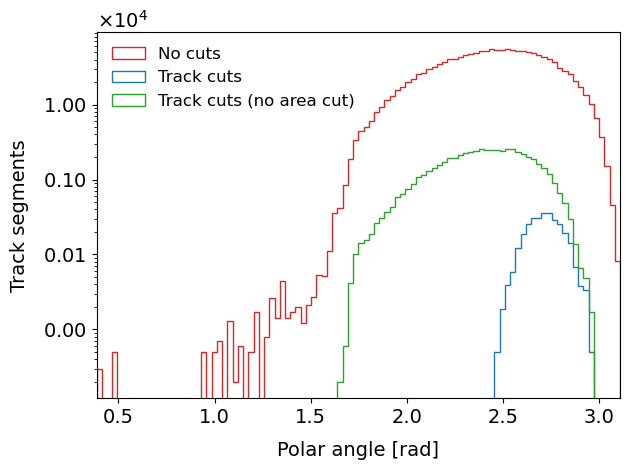

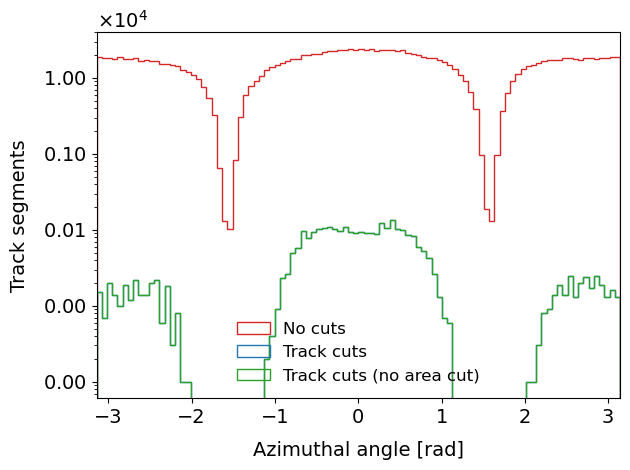

In [48]:
# Angles
theta_raw_ = np.arccos(py_raw_ / ptot_raw_) 
theta_cut_ = np.arccos(py_cut_ / ptot_cut_) 
theta_cut_no_fid_ = np.arccos(py_cut_no_fid_ / ptot_cut_no_fid_) 

phi_raw_ = np.arctan2(px_raw_, pz_raw_) 
phi_cut_ = np.arctan2(px_cut_, pz_cut_) 
phi_cut_no_fid_ = np.arctan2(px_cut_, pz_cut_) 

Plot1DOverlay({"No cuts" : theta_raw_, "Track cuts" : theta_cut_, "Track cuts (no area cut)" : theta_cut_no_fid_}
              , nbins=100, xmin=np.min(theta_raw_), xmax=np.max(theta_raw_)
              , xlabel="Polar angle [rad]", ylabel="Track segments"
              , fout=f"../Images/{recon}/TrackCuts/h1_trkTheta_cut_overlay.png"
              # , norm=True
              , log=True
              , legPos="best")

# Plot2D(x=ak.flatten(data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)
#        , y=theta_raw_
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=np.min(theta_raw_), ymax=np.max(theta_raw_)
#        , title="Track cuts", xlabel="KKInter X [mm]", ylabel="Polar angle [rad]"
#        , fout=f"../Images/{recon}/TrackAngle/h2_x_vs_theta_raw.png")

# Plot2D(x=ak.flatten(track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)
#        , y=theta_cut_
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=np.min(theta_cut_), ymax=np.max(theta_cut_)
#        , title="Track cuts", xlabel="KKInter X [mm]", ylabel="Polar angle [rad]"
#        , fout=f"../Images/{recon}/TrackAngle/h2_x_vs_theta_track_cuts.png")

Plot1DOverlay({"No cuts" : phi_raw_, "Track cuts" : phi_cut_, "Track cuts (no area cut)" : phi_cut_no_fid_}
              , nbins=100, xmin=np.min(phi_raw_), xmax=np.max(phi_raw_)
              , xlabel="Azimuthal angle [rad]", ylabel="Track segments"
              , fout=f"../Images/{recon}/TrackCuts/h1_trkPhi_cut_overlay.png"
              , log=True
              , legPos="best")

In [11]:
# # Momentum
# px = ak.flatten(data_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fX"], axis=None)
# py = ak.flatten(data_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fY"], axis=None)
# pz = ak.flatten(data_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fZ"], axis=None)
# ptot = np.sqrt( px**2 + py**2 + pz**2 )

# Plot1D(ptot
#        , nbins=100, xmin=np.min(ptot), xmax=np.max(ptot)
#        , title="Raw", xlabel="Track momentum [MeV/c]", ylabel="Track segments"
#        , fout=f"../Images/{recon}/TrackCuts/h1_trkMom_raw.png")

# Plot1D(px
#        , nbins=100, xmin=np.min(px), xmax=np.max(px)
#        , title="Raw", xlabel="Track $p_{x}$ [MeV/c]", ylabel="Track segments"
#        , fout=f"../Images/{recon}/TrackCuts/h1_trkMomX_raw.png")

# Plot1D(py
#        , nbins=100, xmin=np.min(py), xmax=np.max(py)
#        , title="Raw", xlabel="Track momentum [MeV/c]", ylabel="Track segments"
#        , fout=f"../Images/{recon}/TrackCuts/h1_trkMomY_raw.png")

# Plot1D(pz
#        , nbins=100, xmin=np.min(pz), xmax=np.max(pz)
#        , title="Raw", xlabel="Track momentum [MeV/c]", ylabel="Track segments"
#        , fout=f"../Images/{recon}/TrackCuts/h1_trkMomZ_raw.png")


In [12]:
# # Momentum
# px = ak.flatten(track_cuts_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fX"], axis=None)
# py = ak.flatten(track_cuts_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fY"], axis=None)
# pz = ak.flatten(track_cuts_["trkfit"]["klfit"]["mom"]["fCoordinates"]["fZ"], axis=None)
# ptot = np.sqrt( px**2 + py**2 + pz**2 )

# Plot1D(ptot
#        , nbins=100, xmin=np.min(ptot), xmax=np.max(ptot)
#        , title="Raw", xlabel="Track momentum [MeV/c]", ylabel="Track segments"
#        , fout=f"../Images/{recon}/TrackCuts/h1_trkMom_track_cuts.png")

# Plot1D(px
#        , nbins=100, xmin=np.min(px), xmax=np.max(px)
#        , title="Raw", xlabel="Track $p_{x}$ [MeV/c]", ylabel="Track segments"
#        , fout=f"../Images/{recon}/TrackCuts/h1_trkMomX_track_cuts.png")

# Plot1D(py
#        , nbins=100, xmin=np.min(py), xmax=np.max(py)
#        , title="Raw", xlabel="Track momentum [MeV/c]", ylabel="Track segments"
#        , fout=f"../Images/{recon}/TrackCuts/h1_trkMomY_track_cuts.png")

# Plot1D(pz
#        , nbins=100, xmin=np.min(pz), xmax=np.max(pz)
#        , title="Raw", xlabel="Track momentum [MeV/c]", ylabel="Track segments"
#        , fout=f"../Images/{recon}/TrackCuts/h1_trkMomZ_track_cuts.png")
